### Dataset and Problem formulation
The dataset consists of 50k movie reviews at IMDB containing 2 columns, one with reviews, and the other with the sentiment.

The goal is to find the best ML model for predicting sentiment given a movie review.

In [45]:
# importing all libraires used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import  RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV




In [46]:
__path__ = "/home/robert/Documents/IMDB Dataset.csv"

df = pd.read_csv(__path__)
#An overview of the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


As can be seen, the dataset consists of 50k rows; however, the goal is to create a smaller unbalanced dataset of 10k rows. This dataset will contain 9k positive and 1k negative reviews. 

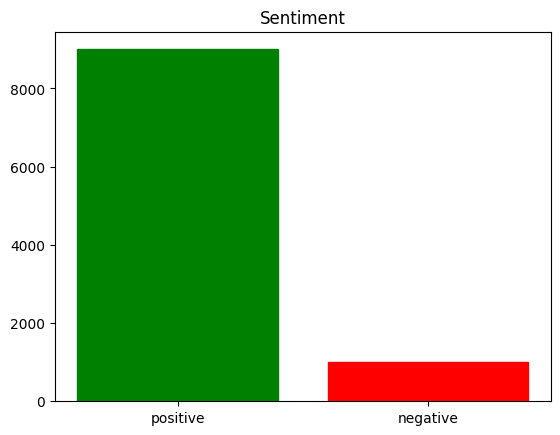

In [48]:
df_positive = df[df.sentiment.eq('positive')].sample(9000)
df_negative = df[df.sentiment.eq('negative')].sample(1000)


df_imb = pd.concat([df_positive,df_negative])

objects = ('positive', 'negative')
y_pos = np.arange(len(objects))
counts = (len(df_positive),len(df_negative))
bar = plt.bar(y_pos,counts,align='center')
plt.xticks(y_pos,objects)
bar[0].set_color('g')
bar[1].set_color('r')
plt.title('Sentiment')
plt.show()

The data now is imbalanced, as can be seen from the graph above. To mitigate this RandomUnderSampler will be used.

In [49]:
rus = RandomUnderSampler(random_state=0)
df_bal, df_bal['sentiment'] = rus.fit_resample(df_imb[['review']],
                                               df_imb['sentiment'])

df_bal


,review,sentiment
0,I actually liked this movie until the end. Sur...,negative
1,"Pacino, and Maconadump really hit the mark wit...",negative
2,Pretty bad PRC cheapie which I rarely bother t...,negative
3,I see that C. Thomas Howell has appeared in ma...,negative
4,Think of the ending of the Grudge 2 with the f...,negative
...,...,...
1995,I get a kick out of the new Who fans who call ...,positive
1996,"After all these years, of Peter O'Tool's brill...",positive
1997,I first saw this as a child living in East Lon...,positive
1998,Tobe Hooper (fresh off mainstream success with...,positive


As can be seen now the dataset is balanced. First, there is an instance of RandomUserSampler created; note that the randomization is controlled by random_state. After that, the balanced dataset is created by taking the data (reviews) which have to be sampled with equal labels (sentiment.)

The data will be split into training and testing,  corresponding to 0.7 and 0.3 respectively.

In [50]:
train, test = train_test_split(df_bal,test_size=0.3, random_state=7)

#independent and dependent variables
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']


### Turning text data into numerical vectors
The goal is to identify unique/representative words for positive reviews and negative reviews. The text will be turned into numerical vectors with TF-IDF, which computes "weights" that represent how important a word is to documents in a collection of documents, i.e. corpus.


In [51]:
tfidf = TfidfVectorizer(stop_words='english')
train_x_vec = tfidf.fit_transform(train_x)
test_x_vec = tfidf.transform(test_x)




### Model Selection
The problem to be solved is a classification problem; the most common algorithms will be trained and tested.


### Support Vector Machines (SVM)

In [52]:
svc = SVC(kernel='linear')
svc.fit(train_x_vec,train_y)


SVC(kernel='linear')

In [53]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


### Decision Tree

In [54]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vec,train_y)

DecisionTreeClassifier()

In [55]:
print(dec_tree.predict(tfidf.transform(['A good movie'])))
print(dec_tree.predict(tfidf.transform(['An excellent movie'])))
print(dec_tree.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['positive']


### Naive Bayes



In [56]:
gnb = GaussianNB()
gnb.fit(train_x_vec.toarray(),train_y)

GaussianNB()

In [57]:
print(gnb.predict(tfidf.transform(['A good movie']).toarray()))
print(gnb.predict(tfidf.transform(['An excellent movie']).toarray()))
print(gnb.predict(tfidf.transform(['I did not like this movie at all']).toarray()))

['negative']
['negative']
['negative']


### Logistic Regression

In [58]:
log_reg = LogisticRegression()
log_reg.fit(train_x_vec,train_y)

LogisticRegression()

In [59]:
print(log_reg.predict(tfidf.transform(['A good movie'])))
print(log_reg.predict(tfidf.transform(['An excellent movie'])))
print(log_reg.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


### Models Evaluation
The test set will be used to evaluate the models, this will be done by using classic metrics.
### Mean Accuracy

In [60]:
print(f"Mean Accuracy for SVM: {svc.score(test_x_vec,test_y)}")
print(f"Mean Accuracy for Decision tree: {dec_tree.score(test_x_vec,test_y)}")
print(f"Mean Accuracy for Naive Bayes: {gnb.score(test_x_vec.toarray(),test_y)}")
print(f"Mean Accuracy for Logistic Regression: {log_reg.score(test_x_vec,test_y)}")

Mean Accuracy for SVM: 0.8416666666666667
Mean Accuracy for Decision tree: 0.6433333333333333
Mean Accuracy for Naive Bayes: 0.59
Mean Accuracy for Logistic Regression: 0.8266666666666667


As can be seen above the two models that perform better are SVM and Logistic Regression, however, SVM has a slight advantage in terms of accuracy.

### F1 Score
F1 is the weighted average of Precision and Recall. Accuracy is usually used when the True positives and the true Negatives are more important while the F1 score is used when the False Negatives and False Positives are important. Note that the F1 score takes into account how the data is distributed, consequently it is important in the case of imbalanced data.

In [61]:
score_f1 = f1_score(test_y,svc.predict(test_x_vec),
      labels =['positive','negative'],average=None)
print(f"Positive score is: {score_f1[0]}")
print(f"Negative score is: {score_f1[1]}")

Positive score is: 0.8424543946932008
Negative score is: 0.8408710217755444


### Classification report
The above can be seen in a text report, showing classification metrics.

In [62]:
print(classification_report(test_y,svc.predict(test_x_vec),
                            labels=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.82      0.87      0.84       292
    negative       0.87      0.81      0.84       308

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



### Confusion Matrix
A confusion matrix is a square matrix where the rows represent the actual classes and the columns represent the predicted classes. The cells represent the True positives, False positives, True negatives, and False negatives.


In [63]:
conf_mat = confusion_matrix(test_y,svc.predict(test_x_vec),
                                               labels=['positive','negative'])
conf_mat

array([[254,  38],
       [ 57, 251]])

### Fine-Tunning


In [64]:
param_grid = {'C':[1,4,8,16,32],'kernel':['linear','rbf'],'gamma': [0.1, 1, 10]}
svc = SVC()
svc_grid = GridSearchCV(svc,param_grid=param_grid,cv=5)
svc_grid.fit(train_x_vec,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [65]:
print(f"The best model parameters are {svc_grid.best_params_}")
print(f"the best model estimator is {svc_grid.best_estimator_}")

The best model parameters are {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
the best model estimator is SVC(C=4, gamma=0.1)


In [66]:
print(classification_report(test_y,svc_grid.predict(test_x_vec),
                            labels=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.82      0.89      0.85       292
    negative       0.88      0.81      0.85       308

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

